#**DATA PREPARATION 2**

**Goal** : Preprocessing the data to be "machine learning" ready

**Steps**
1. Importing data prepared from data preparation 1 along withe the necessary libraries
2. Splitting the data set from onset to avoid bias
3. Converting all dtytpes into numeric dtypes
4. Handling missing values
5. Selecting relevant columns from ML data
6. Outlier detection
7. Handling data imbalance using SMOTE

## Computing the descriptors

In [ ]:
!pip install rdkit
!pip install mordred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 35.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.9 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176723 sha256=8615615113ee07ddf4081e9f627b79973afdf991335f09140edbfbe7cc2c9ce4
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/Assayresults_preprocessed.csv"

In [ ]:
df = pd.read_csv(url)
df

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,100.0,1
1,1,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,99.0,1
2,2,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,99.0,1
3,3,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,99.0,1
4,4,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,99.0,1
...,...,...,...,...,...
2333,2337,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,0.0,0
2334,2338,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0
2335,2339,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0
2336,2340,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0


In [ ]:
from rdkit import Chem
from mordred import Calculator, descriptors

ModuleNotFoundError: ignored

In [ ]:
smiles_list = df['Canonical_smiles'].to_list()  # convert the Canonical Smiles columns to a list
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list] # generates the 2D structures of molecular smiles

In [ ]:
#Function to calculate mordred descriptors
def mordred_desc(data):  #receives canonical smiles in a list datastructure
  calc = Calculator(descriptors, ignore_3D=True)  
  return calc.pandas(data)

In [ ]:
df_mordred = mordred_desc(mols)
df_mordred

In [ ]:
df1 = df_mordred.copy()

In [ ]:
df1.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O'), dtype('bool')],
      dtype=object)

In [ ]:
#function that checks if an entry dtype is numeric. If not, it converts it to numeric or not available

def float_converter(x):
    if not isinstance(x, (float, int, bool)):
        try:
            return float(x)
        except ValueError:
            return np.nan
    else:
        return x


# Apply the function to all columns in the DataFrame


In [ ]:
df2 =  df1.applymap(float_converter).copy()
df2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [ ]:
# Apply the function to all columns in the DataFrame
df2.isnull().sum()[df2.isnull().sum() == 2338]

SpAbs_Dt     2338
SpMax_Dt     2338
SpDiam_Dt    2338
SpAD_Dt      2338
SpMAD_Dt     2338
             ... 
MINssssSn    2338
MINsPbH3     2338
MINssPbH2    2338
MINsssPbH    2338
MINssssPb    2338
Length: 96, dtype: int64

In [ ]:
empty_cols = df2.isnull().sum()[df2.isnull().sum() == 2338].index
df2.drop(empty_cols, axis = 1, inplace = True)
df2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [ ]:
# df2.to_csv("df_mordred.csv")

In [ ]:
# # from google.colab import files
# # files.download("df_mordred.csv")

# # save directly to drive
# #!cp "df.mordred.csv" ""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Importing datasets

In [2]:
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/Assayresults_preprocessed.csv"
url_mordred = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/df_mordred.csv"

In [3]:
df_mordred = pd.read_csv(url_mordred, index_col = 0)
df_raw = pd.read_csv(url)

In [4]:
df_mordred

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [5]:
df_raw

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,100.0,1
1,1,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,99.0,1
2,2,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,99.0,1
3,3,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,99.0,1
4,4,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,99.0,1
...,...,...,...,...,...
2333,2337,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,0.0,0
2334,2338,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0
2335,2339,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0
2336,2340,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0


## Imputing and scaling preprocessor

 **Splitting the Dataset**

 The data set is splitted from the onset to prevent a look ahead bias

 "The purpose of Computation is *insight* not *numbers*" -Richard Hamming

In [45]:
X = df_mordred
y = df_raw["Activity_outcome"]
Y = df_raw["Activity_score"]

In [46]:
#Splitting our data into train and test data using train_test_split module

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [47]:
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1889,24.357869,17.794542,0,0,41.215625,2.347422,4.694843,41.215625,1.287988,4.369070,...,10.135749,67.414341,442.210387,7.132426,3719,46,158.0,179.0,10.500000,7.250000
892,22.969849,18.311017,0,0,35.941125,2.691135,5.306065,35.941125,1.283612,4.317123,...,10.877198,81.346741,390.240624,6.294204,1772,61,170.0,218.0,9.826389,5.687500
1753,15.604129,12.735781,0,0,26.207578,2.479573,4.834424,26.207578,1.310379,3.933379,...,9.887612,67.901737,271.157229,6.613591,873,28,104.0,121.0,5.145833,4.458333
1916,24.248480,17.563645,0,0,40.562314,2.355998,4.709981,40.562314,1.308462,4.360403,...,10.185617,80.094964,444.090369,9.251883,3439,44,160.0,184.0,8.750000,6.833333
849,19.746619,16.450850,2,0,33.938276,2.399239,4.777534,33.938276,1.305318,4.177400,...,10.086101,74.330916,372.125612,8.089687,1804,40,132.0,155.0,8.388889,6.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,22.265059,17.119315,0,0,37.270853,2.486186,4.733166,37.270853,1.285202,4.279957,...,10.106959,78.650021,402.159100,7.733829,2877,42,146.0,168.0,9.750000,6.472222
1095,25.421655,19.002671,2,0,41.130085,2.417357,4.834715,41.130085,1.246366,4.405513,...,10.309652,68.924558,454.171316,8.257660,3832,51,168.0,193.0,12.583333,7.222222
1130,17.177412,13.499159,0,0,28.393729,2.445231,4.798280,28.393729,1.290624,4.024393,...,9.983638,64.253785,316.061470,9.030328,1044,38,116.0,136.0,7.388889,4.833333
1294,24.372550,18.814276,0,0,39.848651,2.583679,5.065890,39.848651,1.285440,4.372566,...,10.536327,81.901169,421.163771,7.799329,2894,55,168.0,203.0,10.673611,6.722222


In [48]:
Y_train = Y.iloc[X_train.index]
Y_test = Y.iloc[X_test.index]

**Handling missing values**

mean?, mode?, median?, interpolation?...

"https://www.sciencedirect.com/science/article/pii/S0895435618308710"

"To ask the right question is harder than to answer it" - George Cantor

In [49]:
# #All columns that contains missing values and the amount of missing values they contain
# X_train.isnull().sum()[X_train.isnull().sum() != 0 ]

In [50]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plotting a KDE plot
# sns.kdeplot(X_train['SpAbs_A'])
# plt.xlabel('SpAbs_A')
# plt.ylabel('Density')
# plt.title('KDE Plot of SpAbs_A')
# plt.show()

In [51]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy = "mean")
# imputer.fit(X_train)
# X_train = pd.DataFrame(imputer.transform(X_train), columns = X_train.columns)
# X_train

In [52]:
#using KNNimputer to handle missing values
# from sklearn.impute import KNNImputer

# knn_impute = KNNImputer()
# knn_impute.fit(X_train)
# X_train = pd.DataFrame(knn_impute.transform(X_train), columns = X_train.columns)
# X_train

In [53]:
# # Plotting a KDE plot
# sns.kdeplot(X_train['SpAbs_A'])
# plt.xlabel('SpAbs_A')
# plt.ylabel('Density')
# plt.title('KDE Plot of SpAbs_A')
# plt.show()

In [54]:
# X_train.isnull().sum()[X_train.isnull().sum() != 0]

**Scaling of dataset**

Is it really necessary?

In [55]:
# # # scaling the data

# from sklearn.preprocessing import StandardScaler

# # Initialize the StandardScaler transformer
# scaler = StandardScaler()

# # Fit the transformer on the training data
# scaler.fit(X_train)

# # Transform the training data using the fitted transformer
# X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
# X_train

In [56]:
# # Plotting a KDE plot
# sns.kdeplot(X_train['SpAbs_A'])
# plt.xlabel('SpAbs_A')
# plt.ylabel('Density')
# plt.title('KDE Plot of SpAbs_A')
# plt.show()

In [57]:
# Preprocessing pipeline

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import KNNImputer


preprocessor = Pipeline([
              ("Imputation", SimpleImputer(strategy = "mean")),
              ("Scaling", StandardScaler())
])

preprocessor.fit(X_train)



Pipeline(steps=[('Imputation', SimpleImputer()), ('Scaling', StandardScaler())])

In [58]:
X_train = pd.DataFrame(preprocessor.transform(X_train), columns = X_train.columns)
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.709000,0.423986,-0.302060,-0.424576,0.883258,-1.105795,-0.863566,0.883258,0.049383,0.864239,...,0.032137,-0.249090,0.639240,-1.019479,-0.224275,0.313637,0.520120,0.349788,0.624123,0.955756
1,0.454644,0.562551,-0.302060,-0.424576,0.247245,2.869737,2.994625,0.247245,-0.069801,0.639659,...,2.023508,0.953558,0.101450,-1.728947,-0.224275,1.337126,0.829638,1.154413,0.374871,-0.095985
2,-0.895127,-0.933232,-0.302060,-0.424576,-0.926451,0.422726,0.017508,-0.926451,0.659120,-1.019365,...,-0.634306,-0.207018,-1.130843,-1.458619,-0.224276,-0.914551,-0.872711,-0.846833,-1.357045,-0.923355
3,0.688954,0.362038,-0.302060,-0.424576,0.804481,-1.006599,-0.768011,0.804481,0.606913,0.826773,...,0.166070,0.845504,0.658695,0.774421,-0.224275,0.177171,0.571706,0.452945,-0.023419,0.675292
4,-0.136014,0.063486,3.372066,-0.424576,0.005737,-0.506454,-0.341598,0.005737,0.521311,0.035600,...,-0.101208,0.347950,-0.086007,-0.209257,-0.224275,-0.095759,-0.150502,-0.145366,-0.157038,0.133061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,0.325491,0.242829,-0.302060,-0.424576,0.407587,0.499212,-0.621665,0.407587,-0.026496,0.478981,...,-0.045188,0.720776,0.224784,-0.510454,-0.224275,0.040706,0.210602,0.122843,0.346605,0.432223
1632,0.903939,0.748115,3.372066,-0.424576,0.872944,-0.296889,0.019339,0.872944,-1.084060,1.021792,...,0.499203,-0.118728,0.763014,-0.067085,-0.224275,0.654800,0.778052,0.638628,1.395005,0.937058
1633,-0.606822,-0.728424,-0.302060,-0.424576,-0.662839,0.025510,-0.210644,-0.662839,0.121160,-0.625887,...,-0.376401,-0.521910,-0.666167,0.586898,-0.224276,-0.232225,-0.563193,-0.537362,-0.527062,-0.670937
1634,0.711690,0.697570,-0.302060,-0.424576,0.718425,1.626852,1.478579,0.718425,-0.020001,0.879355,...,1.108003,1.001416,0.421447,-0.455015,-0.224275,0.927730,0.778052,0.844942,0.688363,0.600501


## **Feature Selection**

**Goal** : To select the most statistically relevant columns


Article link: "https://www.sciencedirect.com/science/article/pii/S0016236122006950#:~:text=The%20method%20focuses%20on%20reducing%20the%20number%20of,identify%20dominant%20chemical-structure%20features%20that%20impact%20property%20values."

In [59]:
#removing low_variance columns

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0)
selector.fit(X_train)

mask = selector.get_support() #gets boolean mask of selected features
high_var_cols = X_train.columns[mask]

X_train_var= X_train[high_var_cols].copy()
X_train_var

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.709000,0.423986,-0.302060,-0.424576,0.883258,-1.105795,-0.863566,0.883258,0.049383,0.864239,...,0.032137,-0.249090,0.639240,-1.019479,-0.224275,0.313637,0.520120,0.349788,0.624123,0.955756
1,0.454644,0.562551,-0.302060,-0.424576,0.247245,2.869737,2.994625,0.247245,-0.069801,0.639659,...,2.023508,0.953558,0.101450,-1.728947,-0.224275,1.337126,0.829638,1.154413,0.374871,-0.095985
2,-0.895127,-0.933232,-0.302060,-0.424576,-0.926451,0.422726,0.017508,-0.926451,0.659120,-1.019365,...,-0.634306,-0.207018,-1.130843,-1.458619,-0.224276,-0.914551,-0.872711,-0.846833,-1.357045,-0.923355
3,0.688954,0.362038,-0.302060,-0.424576,0.804481,-1.006599,-0.768011,0.804481,0.606913,0.826773,...,0.166070,0.845504,0.658695,0.774421,-0.224275,0.177171,0.571706,0.452945,-0.023419,0.675292
4,-0.136014,0.063486,3.372066,-0.424576,0.005737,-0.506454,-0.341598,0.005737,0.521311,0.035600,...,-0.101208,0.347950,-0.086007,-0.209257,-0.224275,-0.095759,-0.150502,-0.145366,-0.157038,0.133061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,0.325491,0.242829,-0.302060,-0.424576,0.407587,0.499212,-0.621665,0.407587,-0.026496,0.478981,...,-0.045188,0.720776,0.224784,-0.510454,-0.224275,0.040706,0.210602,0.122843,0.346605,0.432223
1632,0.903939,0.748115,3.372066,-0.424576,0.872944,-0.296889,0.019339,0.872944,-1.084060,1.021792,...,0.499203,-0.118728,0.763014,-0.067085,-0.224275,0.654800,0.778052,0.638628,1.395005,0.937058
1633,-0.606822,-0.728424,-0.302060,-0.424576,-0.662839,0.025510,-0.210644,-0.662839,0.121160,-0.625887,...,-0.376401,-0.521910,-0.666167,0.586898,-0.224276,-0.232225,-0.563193,-0.537362,-0.527062,-0.670937
1634,0.711690,0.697570,-0.302060,-0.424576,0.718425,1.626852,1.478579,0.718425,-0.020001,0.879355,...,1.108003,1.001416,0.421447,-0.455015,-0.224275,0.927730,0.778052,0.844942,0.688363,0.600501


In [60]:
#function to take high ranking features in the target and reduce their correlated features

def compare(target_corr, feature_corr_matrix, threshold):
    corr_features = []
    remaining_features = target_corr.index.tolist()
    
    while remaining_features:
        feature = remaining_features[0]
        corr_features.append(feature)
        related_features = [f for f in feature_corr_matrix.columns if abs(feature_corr_matrix.loc[feature, f]) >= threshold]
        remaining_features = [f for f in remaining_features if f not in related_features]
    
    return corr_features


In [61]:
def correlation(dataset, threshold):
  col_corr = set()  #Set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [62]:
corr_features = correlation(X_train_var, 0.9)
col_names = list(X_train_var.drop(corr_features, axis = 1).columns)
len(col_names)

597

In [63]:
X_train = X_train[col_names].copy()
X_train

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,VR3_A,nAromAtom,nSpiro,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,SRW05,TSRW10,WPath
0,0.709000,-0.302060,-0.424576,-1.105795,0.049383,9.507165e-01,-0.065671,0.192518,-0.292680,-0.160901,...,-0.907443,0.372795,-0.082017,0.311392,0.154002,-0.899318,0.075292,-1.203165,-0.249090,-0.224275
1,0.454644,-0.302060,-0.424576,2.869737,-0.069801,7.483672e-01,-0.066428,-0.144604,-2.542444,-0.160901,...,1.554916,1.587287,1.701142,1.533861,1.056107,0.740749,0.654701,1.093015,0.953558,-0.224275
2,-0.895127,-0.302060,-0.424576,0.422726,0.659120,-1.762628e+00,-0.064999,-0.022524,-1.417562,5.000547,...,-1.675270,-1.427359,-0.138002,-0.564439,-1.466979,-1.092585,-0.187635,0.605329,-0.207018,-0.224276
3,0.688954,-0.302060,-0.424576,-1.006599,0.606913,1.715177e-01,-0.064134,0.495907,0.644721,-0.160901,...,-0.369631,-1.623499,0.596343,-1.457311,-0.407692,-0.371410,-0.780358,0.605329,0.845504,-0.224275
4,-0.136014,3.372066,-0.424576,-0.506454,0.521311,1.255944e+00,-0.067247,-0.562925,0.644721,-0.160901,...,0.037225,-1.013039,-0.446591,-0.254378,-0.111345,0.738314,-0.027353,0.605329,0.347950,-0.224275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,0.325491,-0.302060,-0.424576,0.499212,-0.026496,-1.721706e+00,0.064251,3.138720,-1.417562,-0.160901,...,-1.010948,0.150353,-0.142764,-1.011352,0.688982,0.186740,-0.316382,0.605329,0.720776,-0.224275
1632,0.903939,3.372066,-0.424576,-0.296889,-1.084060,1.910278e-01,-0.057414,1.270107,0.457241,-0.160901,...,0.771807,0.173964,-0.007733,0.076684,1.107239,-0.093126,0.576532,-1.203165,-0.118728,-0.224275
1633,-0.606822,-0.302060,-0.424576,0.025510,0.121160,-6.034123e-02,-0.067134,-0.635994,-0.292680,-0.160901,...,1.369521,-1.062981,2.835117,-0.699418,1.531660,0.367114,1.241454,-1.203165,-0.521910,-0.224276
1634,0.711690,-0.302060,-0.424576,1.626852,-0.020001,-3.431274e-01,-0.050922,1.583535,-0.292680,5.000547,...,0.162422,0.583762,0.338367,0.941350,0.278636,-0.733404,0.303600,0.605329,1.001416,-0.224275


In [64]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_var)
cumsum = np.cumsum(pca.explained_variance_ratio_)

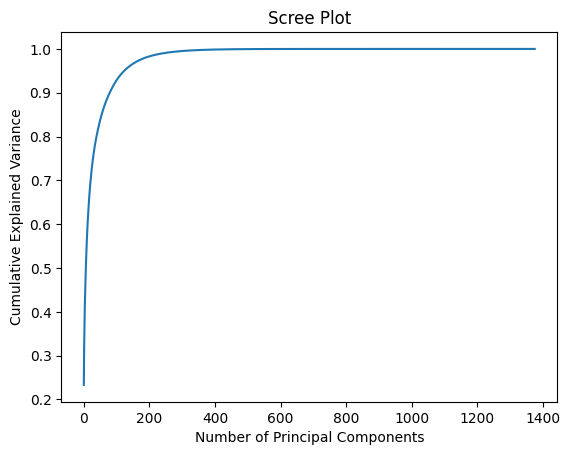

In [65]:
import matplotlib.pyplot as plt
# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


In [66]:
# Find the optimal number of components
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
optimal_n_components = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1
print("Optimal number of components:", optimal_n_components)

# Retain the optimal number of components
pca = PCA(n_components=optimal_n_components)
X_train_transformed = pca.fit_transform(X_train)

Optimal number of components: 125


In [67]:
X_train_transformed.shape

(1636, 125)

In [68]:
#RFE feature selection
from sklearn.feature_selection import RFE

estimator = RandomForestClassifier(n_estimators = 1000, random_state = 33)
rfe = RFE(estimator)

rfe.fit(X_train_transformed, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=1000, random_state=33))

AttributeError: ignored

# **Data Imbalance**

In [ ]:
print(f"Total number of compounds: {y_train.count()} \nTotal actives: {y_train[y_train == 1].count()} \nTotal inactives: {y_train[y_train == 0].count()}")

Total number of compounds: 1636 
Total actives: 681 
Total inactives: 955


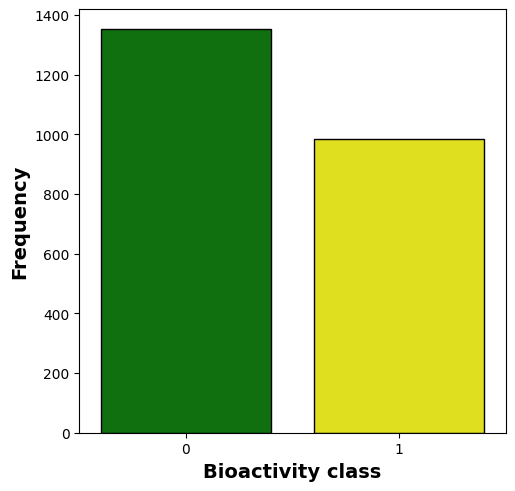

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(5.5, 5.5))

sns.countplot(x ="Activity_outcome" , data=df_raw, edgecolor='black', palette=['green', 'yellow'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')
plt.show()
     

<ipython-input-131-876a577018f5>:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data = visual_pca, x = "pca1", y = "pca2", hue = y_train, palette=custom_palette)


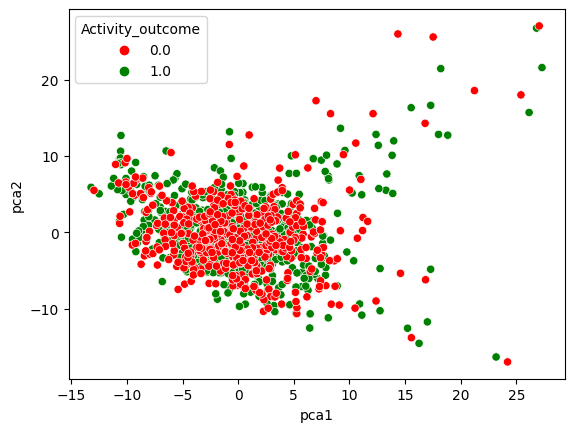

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

pca.fit(X_train)
visual_pca = pd.DataFrame(pca.transform(X_train), columns = ["pca1", "pca2"])


#visualizing the datapoints across two features to observe the imbalance in datapoints
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = ["red", "green", "blue"]  # Add more colors as needed

sns.scatterplot(data = visual_pca, x = "pca1", y = "pca2", hue = y_train, palette=custom_palette)
plt.show()


In [ ]:
#resampling our data using SMOTE

from imblearn.over_sampling import SMOTE
# assume X is your feature matrix and y is your target vector
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_resampled

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,nBridgehead,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,WPath
0,0.709000,-0.302060,-0.424576,-1.105795,0.049383,9.507165e-01,-0.065671,-0.292680,-0.160901,-0.133202,...,-0.080308,-1.265924,-0.907443,0.372795,-0.082017,0.311392,0.154002,-0.899318,0.075292,-0.224275
1,0.454644,-0.302060,-0.424576,2.869737,-0.069801,7.483672e-01,-0.066428,-2.542444,-0.160901,-0.133202,...,3.146808,2.545151,1.554916,1.587287,1.701142,1.533861,1.056107,0.740749,0.654701,-0.224275
2,-0.895127,-0.302060,-0.424576,0.422726,0.659120,-1.762628e+00,-0.064999,-1.417562,5.000547,-0.133202,...,-0.862014,0.271804,-1.675270,-1.427359,-0.138002,-0.564439,-1.466979,-1.092585,-0.187635,-0.224276
3,0.688954,-0.302060,-0.424576,-1.006599,0.606913,1.715177e-01,-0.064134,0.644721,-0.160901,-0.133202,...,-0.800837,-0.453115,-0.369631,-1.623499,0.596343,-1.457311,-0.407692,-0.371410,-0.780358,-0.224275
4,-0.136014,3.372066,-0.424576,-0.506454,0.521311,1.255944e+00,-0.067247,0.644721,-0.160901,-0.133202,...,0.100718,-0.374852,0.037225,-1.013039,-0.446591,-0.254378,-0.111345,0.738314,-0.027353,-0.224275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,-1.199005,1.535003,1.393764,0.000000,0.000000,-2.210471e-15,0.000000,0.214687,-0.160901,-0.133202,...,-0.511292,-1.038066,-0.479002,-0.682394,-1.132338,-1.927346,-1.397548,-0.377391,-0.327912,0.377181
1906,0.646523,-0.302060,-0.424576,2.786266,1.118590,7.183367e-01,-0.065756,-0.292680,-0.160901,-0.133202,...,0.156308,0.810477,0.934365,0.639565,-0.329353,-0.338361,-0.088137,-0.255867,1.776130,-0.224275
1907,-1.560739,-0.302060,-0.424576,0.248416,1.750124,-1.381979e+00,-0.068055,0.082280,-0.160901,-0.133202,...,-0.392990,-0.167521,0.743320,-0.905514,1.104751,-3.127174,-3.032722,-2.360906,-1.930147,-0.224276
1908,-0.843303,1.510459,-0.424576,-1.432782,-0.415721,-5.779085e-01,-0.066595,-0.292680,-0.160901,-0.133202,...,0.729342,-0.382866,-0.620203,0.847509,-0.127500,-0.613906,-0.413583,0.489130,1.127610,-0.224276


In [ ]:
print(f"Total number of compounds: {y_resampled.count()} \nTotal actives: {y_resampled[y_resampled == 1].count()} \nTotal inactives: {y_resampled[y_resampled == 0].count()}")

Total number of compounds: 1910 
Total actives: 955 
Total inactives: 955


In [ ]:
y_resampled

0       0
1       1
2       0
3       0
4       1
       ..
1905    1
1906    1
1907    1
1908    1
1909    1
Name: Activity_outcome, Length: 1910, dtype: int64

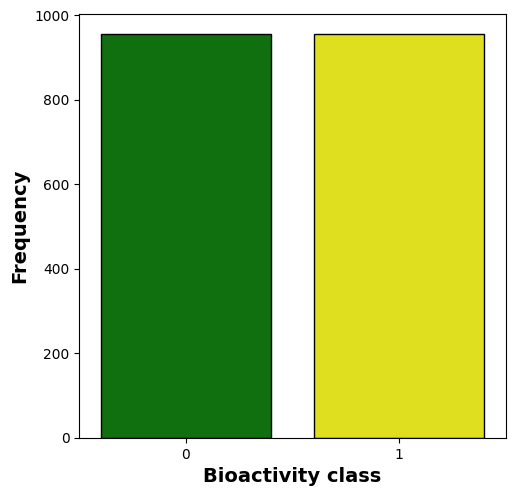

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x =y_resampled , edgecolor='black', palette=['green', 'yellow'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')
plt.show()
     

# Pipeline for processing test data

In [27]:
#Splitting our data into train and test data using train_test_split module

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


Column_selector = ColumnTransformer(
    transformers=[
        ("relevant_cols", "passthrough", col_names)
    ]
)

preprocess_pipeline = Pipeline([
              #("preprocessor", Column_selector),
              ("Imputation", SimpleImputer()),
              ("Scaling", StandardScaler()),
              ("Removing low variance features", VarianceThreshold()),
              ("Selecting principal components", PCA(n_components=125)),
              #("RFE", RFE(RandomForestClassifier(n_estimators = 500, random_state = 42), n_features_to_select = 100))
])


# define pipeline for handling dataImbalance
from imblearn.pipeline import Pipeline as imb_Pipeline

sm_pipeline = imb_Pipeline([
           ("Data Imbalance", SMOTE(random_state = 1, k_neighbors = 5))
])

preprocess_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('relevant_cols',
                                                  'passthrough',
                                                  ['ABC', 'nAcid', 'nBase',
                                                   'SpMax_A', 'SpMAD_A',
                                                   'VE1_A', 'VR1_A', 'VR3_A',
                                                   'nAromAtom', 'nSpiro',
                                                   'nBridgehead', 'nHetero',
                                                   'nB', 'nN', 'nO', 'nS', 'nP',
                                                   'nF', 'nCl', 'nBr', 'nI',
                                                   'nX', 'ATS0dv', 'ATS0s',
                                                   'ATS3s', 'ATS0Z', 'ATS0p',
                                                   'AATS0dv', 'AATS7dv',
                                                   'AATS8dv', ...])])),
                ('Imputation', SimpleImputer()), ('Scaling', StandardScaler()),
                ('Removing low variance features', VarianceThreshold()),
                ('Selecting principal components', PCA(n_components=125))])

In [42]:
#transforming the datasets
transformed_X_train = preprocess_pipeline.transform(X_train)
transformed_X_test = preprocess_pipeline.transform(X_test)

#adding the smote pipeline to handle the data Imbalance in transformed X_train
X_train_resampled, y_train_resampled = sm_pipeline.fit_resample(transformed_X_train, y_train)

In [43]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier


# Define and train the model
rfc = RandomForestClassifier(n_estimators = 700, random_state = 42)
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=700, random_state=42)

# Evaluation metrics

In [31]:
def evaluate(X_test, y_test, model, title="model"):
    from sklearn.metrics import matthews_corrcoef
    from sklearn.metrics import roc_auc_score
    import pandas as pd
    
    y_pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]

    TP = sum((y_pred == 1) & (y_test == 1))
    TN = sum((y_pred == 0) & (y_test == 0))
    FP = sum((y_pred == 1) & (y_test == 0))
    FN = sum((y_pred == 0) & (y_test == 1))

    accuracy = (TP + TN) / (TP + TN + FN + FP)
    sensitivity = (TP) / (TP + FN)
    specificity = (TN) / (TN + FP)
    precision = (TP) / (TP + FP)
    F1 = 2 * ((precision * sensitivity) / (precision + sensitivity))
    balanced_accuracy = (sensitivity + specificity) / 2
    mcc = matthews_corrcoef(y_test, y_pred)
    AUCROC = roc_auc_score(y_test, pred_proba)

    values = [accuracy, sensitivity, specificity, precision, F1, balanced_accuracy, mcc, AUCROC]
    index = ["accuracy", "sensitivity", "specificity", "precision", "F1", "balanced_accuracy", "MCC", "auc_roc"]

    return pd.DataFrame({"scores": values}, index=index)


def plot_roc(X_test, y_test, model):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, roc_auc_score
    
    y_pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

    # Calculate the AUC
    roc_auc = roc_auc_score(y_test, pred_proba)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
evaluate(transformed_X_test, y_test, rfc)

,scores
accuracy,0.820513
sensitivity,0.711475
specificity,0.904282
precision,0.850980
F1,0.775000
balanced_accuracy,0.807879
MCC,0.634645
auc_roc,0.902952


In [44]:
evaluate(transformed_X_test, y_test, rfc)

,scores
accuracy,0.804843
sensitivity,0.685246
specificity,0.896725
precision,0.836000
F1,0.753153
balanced_accuracy,0.790986
MCC,0.602431
auc_roc,0.904877


In [ ]:
#Gridsearch for RandomForest
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param_grid = {
    "n_estimators" : [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'n_estimators': 1000}

In [ ]:
grid_search.best_score_

0.8130890052356022